 **UmojaHack Africa 2022: Faulty Air Quality Sensor Challenge
By Twapa** 


Import libraries

In [ ]:
from google.colab import drive
import pandas as pd
import missingno as mso
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt


pd.options.display.float_format = '{:.5f}'.format


In [ ]:
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
traindata = pd.read_csv('/content/drive/MyDrive/umojahack-africa-2022-beginner-challenge/train.csv',parse_dates = ['Datetime'])
testdata = pd.read_csv('/content/drive/MyDrive/umojahack-africa-2022-beginner-challenge/test.csv',parse_dates = ['Datetime'])
submission = pd.read_csv('/content/drive/MyDrive/umojahack-africa-2022-beginner-challenge/SampleSubmission.csv')

In [ ]:
traindata.shape

(297177, 7)

In [ ]:
traindata.columns

Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
       'Relative_Humidity', 'Offset_fault'],
      dtype='object')

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


In [ ]:
traindata.describe(include="all")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
count,297177,297177,293563.00000,293563.00000,293628.00000,293628.00000,297177.00000
unique,297177,293751,NaN,NaN,NaN,NaN,NaN
top,ID_QF0ZTQJ2SF5Q,2021-11-26 17:23:00,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,NaN
first,NaN,2021-10-15 16:00:31,NaN,NaN,NaN,NaN,NaN
last,NaN,2022-01-21 07:34:57,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,40.75120,38.18302,23.31655,78.65362,0.37107
std,NaN,NaN,28.52618,28.64776,3.83697,14.77272,0.48309
min,NaN,NaN,-9.45000,-9.70000,16.70000,27.00000,0.00000
25%,NaN,NaN,22.43000,19.52000,20.40000,68.00000,0.00000


In [ ]:
traindata.isna().sum()

ID                      0
Datetime                0
Sensor1_PM2.5        3614
Sensor2_PM2.5        3614
Temperature          3549
Relative_Humidity    3549
Offset_fault            0
dtype: int64

In [ ]:
traindatadf = traindata.copy()
traindatadf.head()

,ID,Datetime,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Offset_fault
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58000,49.52000,17.40000,96.00000,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25000,33.40000,25.00000,75.00000,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18000,23.50000,24.90000,75.00000,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40000,15.48000,24.90000,70.00000,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30000,34.77000,20.90000,89.00000,0


In [ ]:
# replacing missing values in quantity
# column with mean of that column
traindatadf["Temperature"] = traindatadf["Temperature"].fillna(traindatadf["Temperature"].mean())
traindatadf["Relative_Humidity"] = traindatadf["Relative_Humidity"].fillna(traindatadf["Relative_Humidity"].mean())
traindatadf["Sensor1_PM2.5"] = traindatadf["Sensor1_PM2.5"].fillna(traindatadf["Sensor1_PM2.5"].mean())
traindatadf["Sensor2_PM2.5"] = traindatadf["Sensor2_PM2.5"].fillna(traindatadf["Sensor2_PM2.5"].mean())




testdata["Temperature"] = testdata["Temperature"].fillna(testdata["Temperature"].mean())
testdata["Relative_Humidity"] = testdata["Relative_Humidity"].fillna(testdata["Relative_Humidity"].mean())
testdata["Sensor1_PM2.5"] = testdata["Sensor1_PM2.5"].fillna(testdata["Sensor1_PM2.5"].mean())
testdata["Sensor2_PM2.5"] = testdata["Sensor2_PM2.5"].fillna(testdata["Sensor2_PM2.5"].mean())

traindatadf['day'] = traindatadf.Datetime.dt.day
traindatadf['month'] = traindatadf.Datetime.dt.month
traindatadf['year'] = traindatadf.Datetime.dt.year
traindatadf['hour'] = traindatadf.Datetime.dt.hour


testdata['day'] = testdata.Datetime.dt.day
testdata['month'] = testdata.Datetime.dt.month
testdata['year'] = testdata.Datetime.dt.year
testdata['hour'] = testdata.Datetime.dt.hour




testdata = testdata.fillna(0)


In [ ]:
traindatadf.isna().sum()

ID                   0
Datetime             0
Sensor1_PM2.5        0
Sensor2_PM2.5        0
Temperature          0
Relative_Humidity    0
Offset_fault         0
day                  0
month                0
year                 0
hour                 0
dtype: int64

In [ ]:

#find outliers
lowerlimit = traindatadf['Sensor1_PM2.5'].quantile(0.10)

traindatadf[traindatadf['Sensor1_PM2.5'] < lowerlimit ]


upperlimit = traindatadf['Sensor1_PM2.5'].quantile(0.90)
traindatadf[traindatadf['Sensor1_PM2.5'] > upperlimit ]

traindataset = traindatadf[(traindatadf['Sensor1_PM2.5'] > lowerlimit) & (traindatadf['Sensor1_PM2.5'] < upperlimit) ]











In [ ]:
y =traindatadf['Offset_fault']
indvaribales = ['Sensor1_PM2.5','Sensor2_PM2.5','Temperature','Relative_Humidity','month']
x =traindatadf[indvaribales].fillna(0)
LABELS = ["normal", "faulty"]

Text(0, 0.5, 'Frequency')

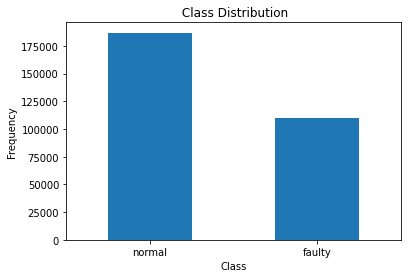

In [ ]:
count_classes = pd.value_counts(y, sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title(" Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
# Implementing Oversampling for Handling Imbalanced 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from collections import Counter
oversample = SMOTE()
x_res, y_res = oversample.fit_resample(x, y)

x_res.shape,y_res.shape



((373806, 5), (373806,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 186903, 1: 110274})
Resampled dataset shape Counter({0: 186903, 1: 186903})


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.33, random_state=42)





rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)



ypred = rfc.predict(x_test)


print(f'random forest {rfc.score(x_test,y_test)}')




random forest 0.9613638574532248


In [ ]:
testdata.shape 

(127361, 10)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


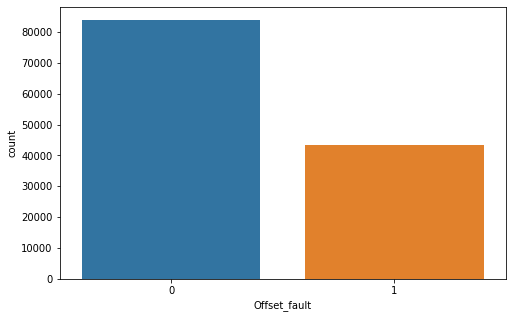

In [ ]:
import seaborn as sns

testdf2 =testdata[indvaribales].fillna(0)
testpred = rfc.predict(testdf2)

filedf = submission.copy()

filedf.Offset_fault =testpred 
plt.figure(figsize=(8,5))
sns.countplot(filedf.Offset_fault)




In [ ]:
filedf.to_csv("submitcsv3.csv",index=False)